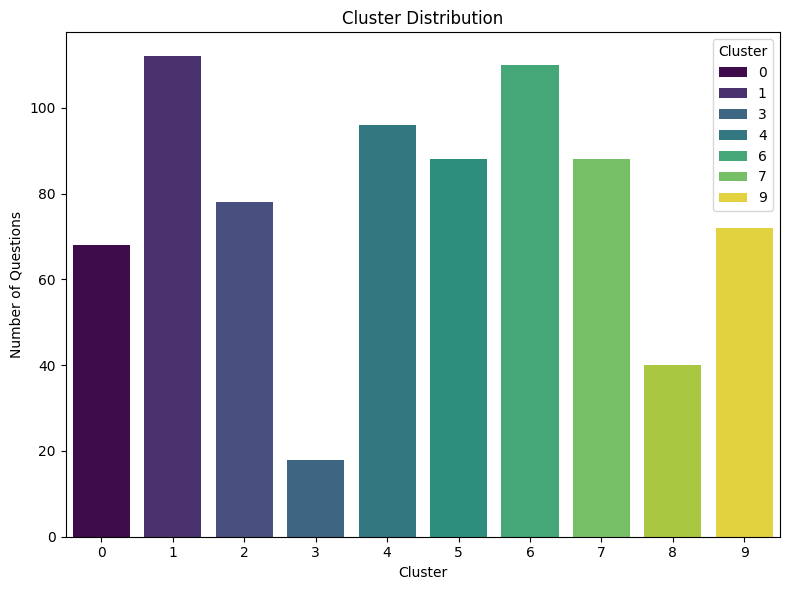

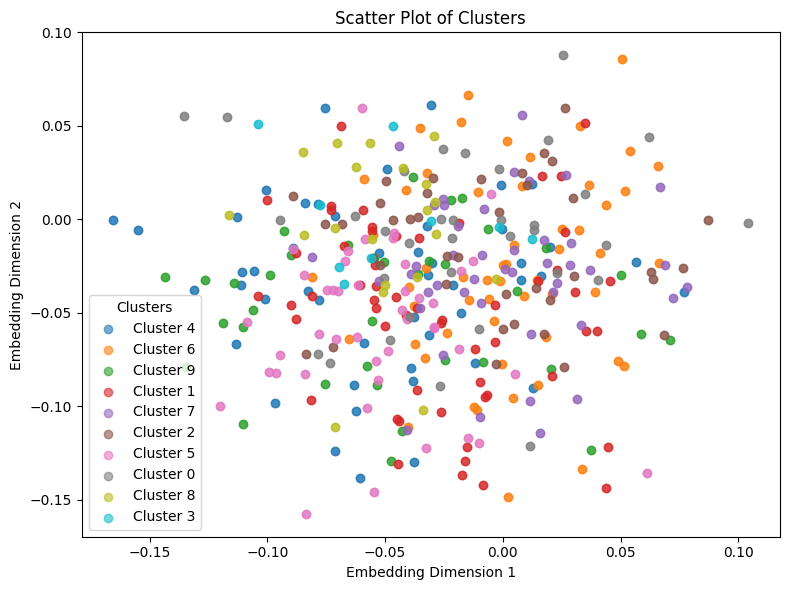

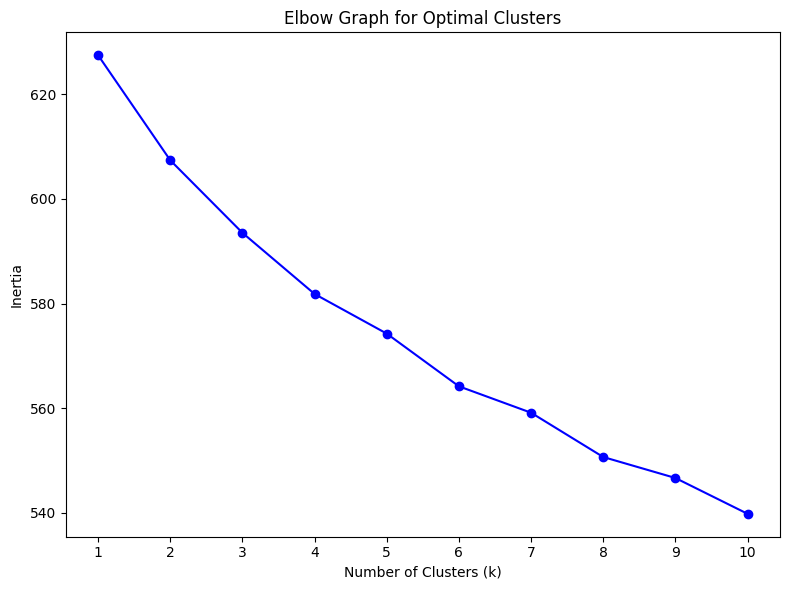

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import ast

# Database connection
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    dbname="mydatabase",
    user="postgres",
    password="y@pradeep"
)

def fetch_data(query):
    """Fetch data from the database using a query."""
    with conn.cursor() as cursor:
        cursor.execute(query)
        data = cursor.fetchall()
        columns = [desc[0] for desc in cursor.description]
        return pd.DataFrame(data, columns=columns)

# Load data from qa_table
qa_data = fetch_data("SELECT question_embedding, cluster_label FROM qa_table")

# Convert embeddings from string to numeric arrays
qa_data['question_embedding'] = qa_data['question_embedding'].apply(
    lambda x: np.array(ast.literal_eval(x))
)

# Extract embeddings and cluster labels
embeddings = np.array(qa_data['question_embedding'].tolist())
cluster_labels = qa_data['cluster_label']

# 1. Bar Graph for Clusters
plt.figure(figsize=(8, 6))
cluster_counts = cluster_labels.value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
sns.barplot(
    data=cluster_counts, x='Cluster', y='Count', palette='viridis', hue='Cluster', dodge=False
)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Questions")
plt.legend(title="Cluster", loc="upper right")
plt.tight_layout()
plt.show()

# 2. Scatter Plot for Clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_labels.unique():
    cluster_points = embeddings[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("Scatter Plot of Clusters")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.legend(title="Clusters")
plt.tight_layout()
plt.show()

# 3. Elbow Graph for Optimal Clusters
plt.figure(figsize=(8, 6))
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o', color='blue')
plt.title("Elbow Graph for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.tight_layout()
plt.show()
